In [1]:
# Victor Z and Ugochukwu Ikegwu
# UW-Madison, 2024
# gibbs reactor example

## Start here if working on google collab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Specify the path of this file (This may differ for each user)
path = '/content/drive/MyDrive/StatsBookCode/Python/'

In [4]:
# This is to check if the speficied path above is correct
!echo $path
import os
os.path.isdir(path)

/content/drive/MyDrive/StatsBookCode/Python/


True

In [5]:
# This is needed so we can import packages from a different path than standard libraries
import sys
sys.path.append(path)

## Start from here if working on local computer

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [7]:
# Load data
filename = path+'Data/gibbs_hightemp.dat'
# read text file into pandas DataFrame
datahigh = pd.read_csv(filename, sep="\t", header=None)
datahigh.head(5)

,0,1
0,166.977686,0.679262
1,170.710337,0.688514
2,141.174815,0.604848
3,146.628653,0.622223
4,164.665427,0.673354


In [8]:
# Load data
filename = path+'Data/gibbs_lowtemp.dat'
# read text file into pandas DataFrame
datalow = pd.read_csv(filename, sep="\t", header=None)
datalow.head(5)

,0,1
0,166.977686,0.802116
1,170.710337,0.808864
2,141.174815,0.745210
3,146.628653,0.758928
4,164.665427,0.797770


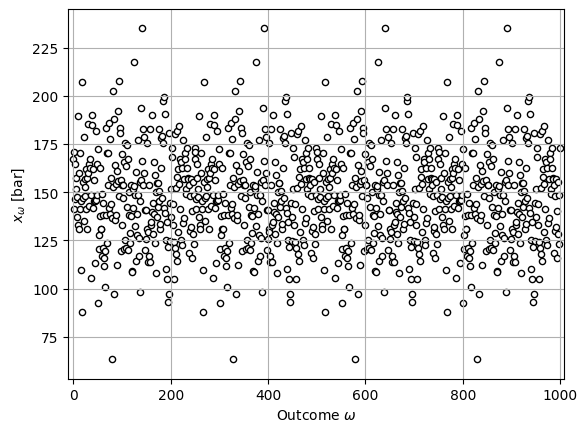

In [9]:
# Compare pdf and cdf of pressure

# Create an array of indices for the y-coordinate
indices = np.arange(len(datahigh.iloc[:,0]))

plt.scatter(indices, datahigh.iloc[:,0], marker='o', s=20, color='white', edgecolor='black')
plt.ylim([min(datahigh.iloc[:,0])-10, max(datahigh.iloc[:,0])+10])
plt.xlim([min(indices)-10, max(indices)+10])
plt.xlabel('Outcome $\omega$')
plt.ylabel('$x_\omega$ [bar]')
plt.grid(True)
plt.show()

In [10]:
# Compute and plot empirical pdf
dx = 10
lb = 0
ub = 0
t = np.arange(60,240+dx,dx)
x = datahigh.iloc[:,0].to_numpy()
N = len(x)

# Compute using indicator

# Initialize the frequency array
f = np.zeros(len(t))

# Compute the empirical PDF using indicator
for i in range(len(t)):
    lb = t[i]
    ub = t[i] + dx
    for j in range(N):
        if lb <= x[j] < ub:
            f[i] += 1

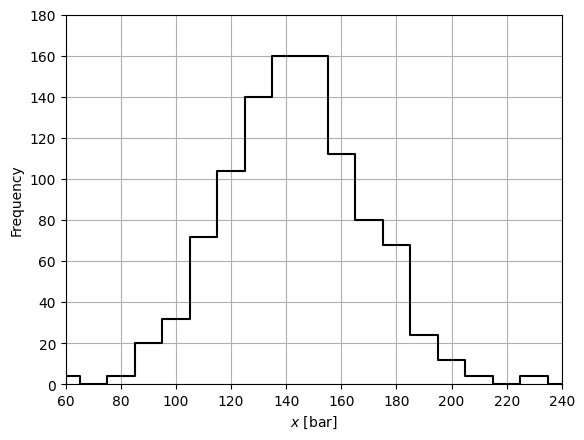

In [11]:
# Plot the empirical PDF
plt.step(t, f, color='black', where='mid')
plt.xlabel('$x$ [bar]')
plt.ylabel('Frequency')
plt.axis([60, 240, 0, 180])
plt.grid(True)
plt.show()

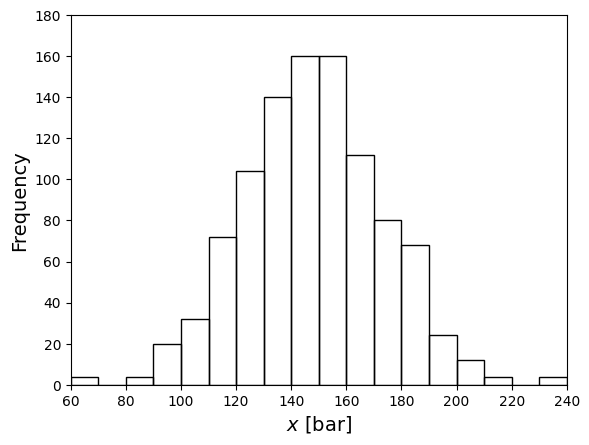

In [15]:
# Or plot the empirical PDF automatically

x = datahigh.iloc[:, 0].to_numpy()  # Convert first column to numpy array

# Create the histogram
plt.hist(x, bins=np.arange(60, 250, 10), edgecolor='black', facecolor='none', linewidth=1, density=False)

# Customize the plot
plt.xlabel('$x$ [bar]', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.axis([60, 240, 0, 180])
plt.grid(False)
plt.show()

In [16]:
# Compute and plot empirical CDF


In [17]:
t = np.arange(60,240+dx,dx)
x = datahigh.iloc[:,0].to_numpy()
N = len(x)

# Initialize the cumulative distribution function array
F = np.zeros(len(t))

# Compute the empirical CDF
for i in range(len(t)):
    for j in range(N):
        if x[j] <= t[i]:
            F[i] += 1

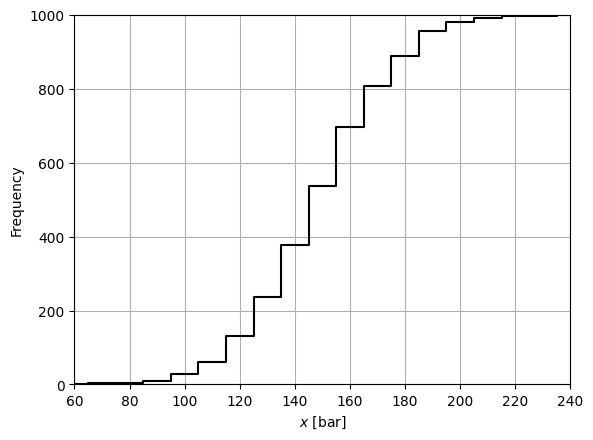

In [19]:
# Plot the empirical CDF
plt.step(t, F, color='black', where='mid')
plt.xlabel('$x$ [bar]')
plt.ylabel('Frequency')
plt.axis([60, 240, 0, 1000])
plt.grid(True)
plt.show()

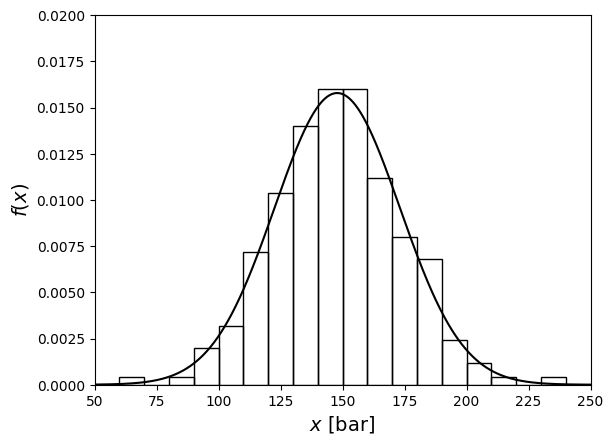

In [20]:
# Get hyperparameters for Gaussian/normal distribution from data and compare empirical and theoretical pdf/cdf

# Fit data to a normal distribution
param = norm.fit(datahigh.iloc[:, 0])

# Generate x values for plotting
x = np.linspace(50, 250, 1000)

# Plot histogram
plt.hist(datahigh.iloc[:, 0], bins=np.arange(50, 251, 10), density=True, edgecolor='black', facecolor='none', linewidth=1)

# Plot fitted normal distribution
plt.plot(x, norm.pdf(x, *param), 'black', linewidth=1.5)

plt.xlabel('$x$ [bar]', fontsize=14)
plt.ylabel('$f(x)$', fontsize=14)
plt.grid(False)
plt.axis([50, 250, 0, 0.02])
plt.show()

(50.0, 250.0, 0.0, 1.01)

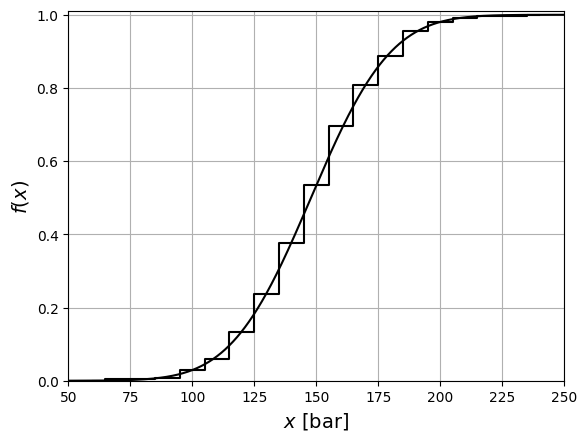

In [21]:
# Generate CDF and gaussian plots
plt.step(t, F/N, color='black', where='mid')

# Plot fitted normal distribution
plt.plot(x, norm.cdf(x, *param), 'black', linewidth=1.5)

plt.xlabel('$x$ [bar]', fontsize=14)
plt.ylabel('$f(x)$', fontsize=14)
plt.grid(True)
plt.axis([50, 250, 0, 1.01])

In [22]:
# Show convergence of empirical approximations as increasing S
dataP = datahigh.iloc[:,0]
Sv = np.arange(5,1001,5)
np.random.seed(1) # to ensure reproducibility

# Extract the mean and STD from the gaussian fit
param_mu, param_sigma = param

# Initialize arrays to store the results
e = np.zeros(len(Sv))
v = np.zeros(len(Sv))

# Iterate over each value in Sv
for j in range(len(Sv)):
    y = np.random.choice(dataP, size=Sv[j], replace=True)
    e[j] = np.mean(y)
    v[j] = np.sqrt(np.var(y))

# Generate linspace for et and vt
et = np.linspace(param_mu, param_mu, len(Sv))
vt = np.linspace(param_sigma, param_sigma, len(Sv))


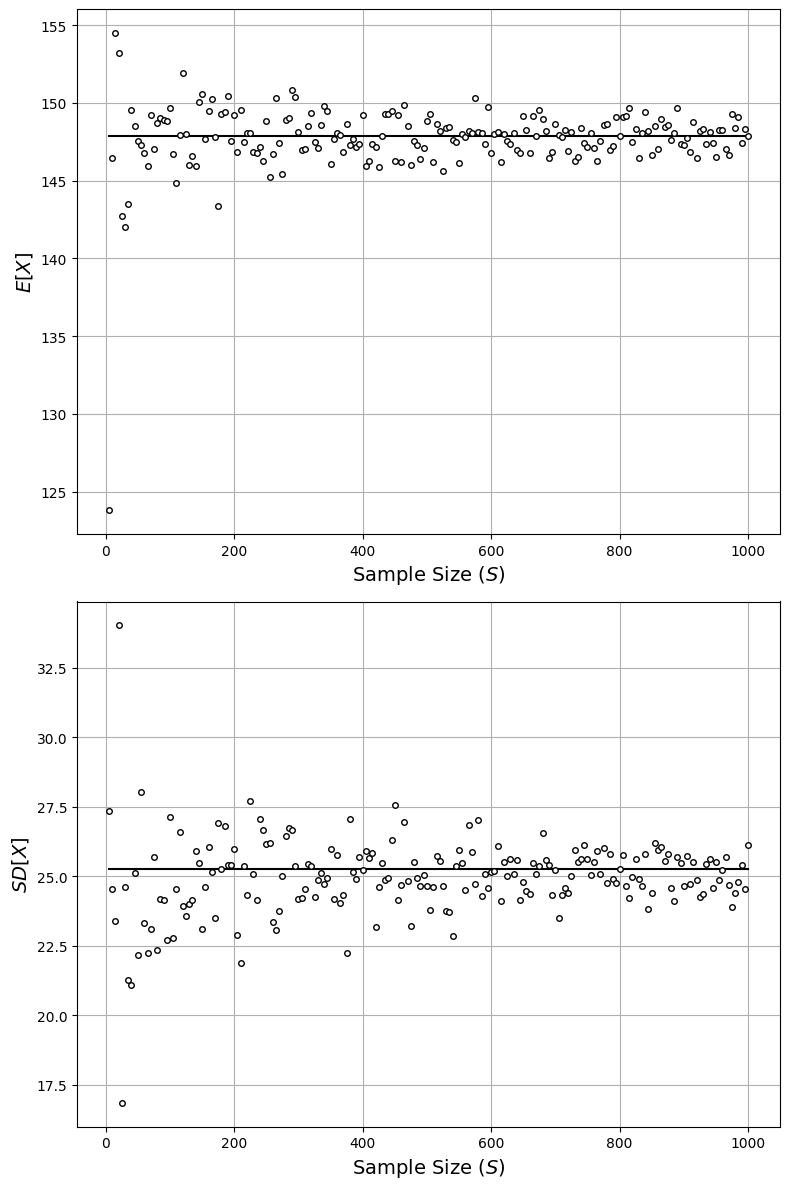

In [23]:
# Visualize the results

# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 12))

# First subplot
axs[0].plot(Sv, et, 'k-', linewidth=1.5)
axs[0].plot(Sv, e, 'ko', markerfacecolor='w', markersize=4)
axs[0].set_xlabel('Sample Size ($S$)', fontsize=14)
axs[0].set_ylabel('$E[X]$', fontsize=14)
axs[0].grid(True)

# Second subplot
axs[1].plot(Sv, vt, 'k-', linewidth=1.5)
axs[1].plot(Sv, v, 'ko', markerfacecolor='w', markersize=4)
axs[1].set_xlabel('Sample Size ($S$)', fontsize=14)
axs[1].set_ylabel('$SD[X]$', fontsize=14)
axs[1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [24]:
# Compute sample moments
from scipy.stats import moment, skew, kurtosis

# Compute sample moments
m1 = moment(dataP, moment=1)
m2 = moment(dataP, moment=2)
m3 = moment(dataP, moment=3)
m4 = moment(dataP, moment=4)

# Compute skewness and kurtosis
sk = skew(dataP)
ku_excess = kurtosis(dataP) # Note: the scipy.stat.kurtosis function returns the excess kurtosis.
ku = ku_excess + 3 # This matches the kurtosis you will get from MATLAB

print(f"1st moment: {m1}")
print(f"2nd moment: {m2}")
print(f"3rd moment: {m3}")
print(f"4th moment: {m4}")
print(f"Skewness: {sk}")
print(f"Kurtosis: {ku}")
print(f"Excess Kurtosis: {ku_excess}")

1st moment: 0.0
2nd moment: 638.7970507624321
3rd moment: 1539.6150634916783
4th moment: 1365752.9443905267
Skewness: 0.09536034156309542
Kurtosis: 3.346927775614276
Excess Kurtosis: 0.3469277756142759


In [25]:
# Sample data
x = datahigh.iloc[:, 0]  # assuming datahigh is a pandas DataFrame
t = np.arange(60, 245, 5)
N = len(x)
F = np.zeros(len(t))

# Compute empirical quantile function
for i in range(len(t)):
    F[i] = np.sum(x <= t[i]) / N

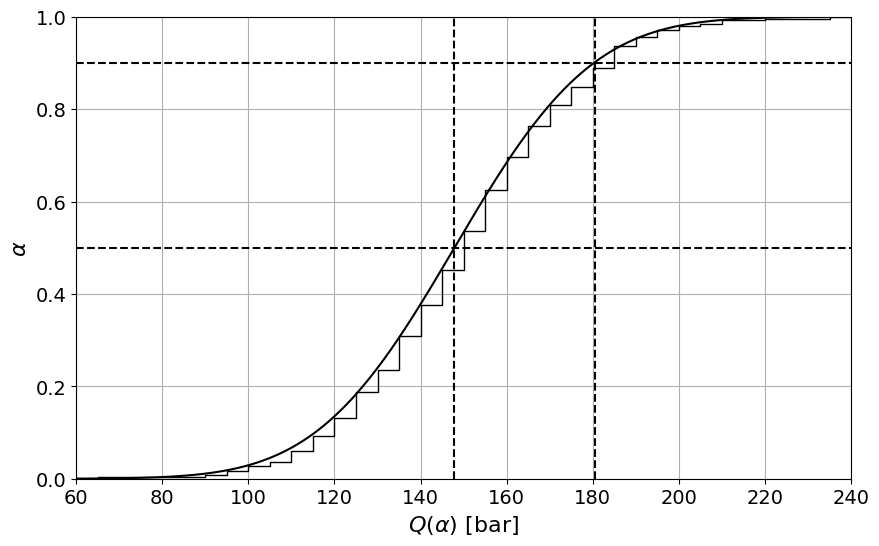

In [26]:
# Visualize the results

# Define the ranges and quantiles
yy1 = np.linspace(0.5, 0.5, 100)
xx1 = np.quantile(dataP, 0.5)
yy2 = np.linspace(0.9, 0.9, 100)
xx2 = np.quantile(dataP, 0.9)
xx = np.linspace(60, 240, 100)
yy = np.linspace(0, 1, 100)

# Compute empirical quantile function
t = np.arange(60, 245, 5)
N = len(datahigh.iloc[:, 0])
F = np.zeros(len(t))
for i in range(len(t)):
    F[i] = np.sum(datahigh.iloc[:, 0] <= t[i]) / N

# Plotting
plt.figure(figsize=(10, 6))

# Stairs plot for empirical quantile function
plt.step(t, F, where='post', linewidth=1, color='black')

# Normal CDF plot
x = np.linspace(50, 250, 500)
plt.plot(x, norm.cdf(x, param_mu, param_sigma), 'black', linewidth=1.5)

# Lines for quantiles
plt.plot(xx, yy1, 'k--')
plt.plot([xx1, xx1], [0, 1], 'k--')
plt.plot(xx, yy2, 'k--')
plt.plot([xx2, xx2], [0, 1], 'k--')

# Axes settings
plt.axis([60, 240, 0, 1])
plt.grid(True)

# Labels
plt.xlabel('$Q(\\alpha)$ [bar]', fontsize=16)
plt.ylabel('$\\alpha$', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Show plot
plt.show()


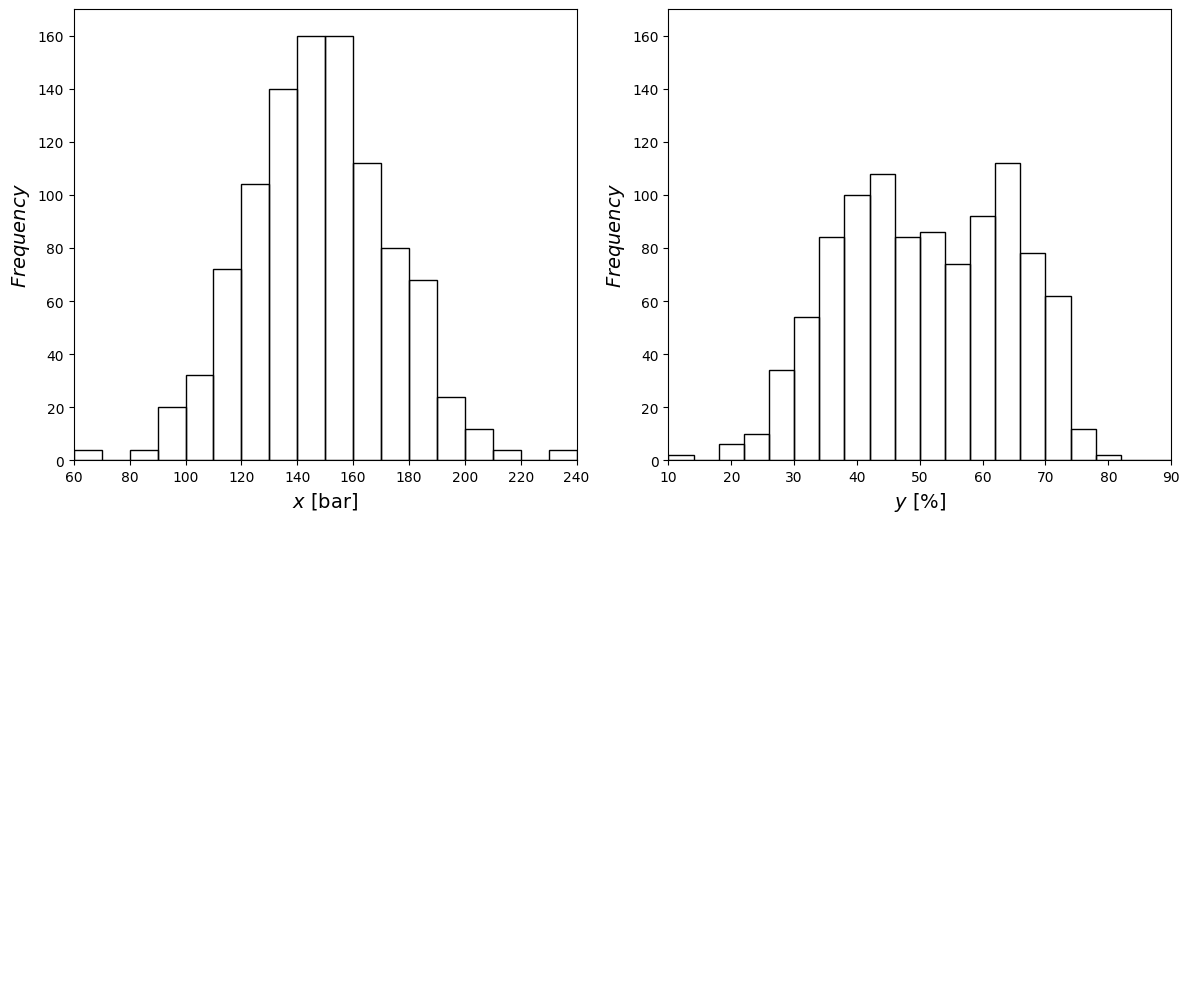

In [27]:
# Compare pressure and conversion pdfs at high temperature

data_x = datahigh.iloc[:, 0]
data_y = 100 * datahigh.iloc[:, 1]

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# First subplot: Histogram of data_x
axs[0, 0].hist(data_x, bins=np.arange(60, 250, 10), edgecolor='black', facecolor='none', linewidth=1)
axs[0, 0].set_xlabel('$x$ [bar]', fontsize=14)
axs[0, 0].set_ylabel('${Frequency}$', fontsize=14)
axs[0, 0].grid(False)
axs[0, 0].axis([60, 240, 0, 170])

# Second subplot: Histogram of data_y
axs[0, 1].hist(data_y, bins=np.arange(10, 94, 4), edgecolor='black', facecolor='none', linewidth=1)
axs[0, 1].set_xlabel('$y$ [%]', fontsize=14)
axs[0, 1].set_ylabel('${Frequency}$', fontsize=14)
axs[0, 1].grid(False)
axs[0, 1].axis([10, 90, 0, 170])

# Hide the other subplots (2,2,3) and (2,2,4)
axs[1, 0].axis('off')
axs[1, 1].axis('off')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


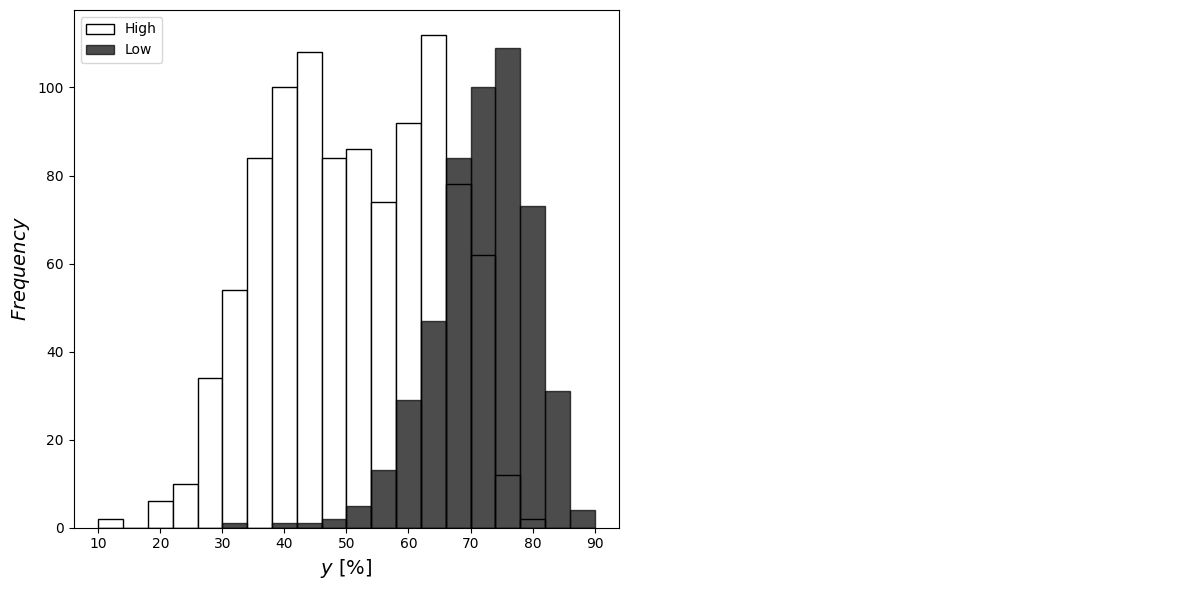

In [28]:
# Compare conversion at low and high temperature
datahigh_y = 100 * datahigh.iloc[:, 1]
datalow_y = 100 * datalow.iloc[:, 1]

# Create a subplot
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: Histogram of datahigh_y and datalow_y
ax[0].hist(datahigh_y, bins=np.arange(10, 94, 4), edgecolor='black', facecolor='white', linewidth=1, label='High')
ax[0].hist(datalow_y, bins=np.arange(10, 94, 4), edgecolor='black', facecolor='black', linewidth=1, alpha=0.7, label='Low')

# Labels and grid
ax[0].set_xlabel('$y$ [%]', fontsize=14)
ax[0].set_ylabel('${Frequency}$', fontsize=14)

# Legend
ax[0].legend(loc='upper left')

# Hide the second subplot
ax[1].axis('off')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


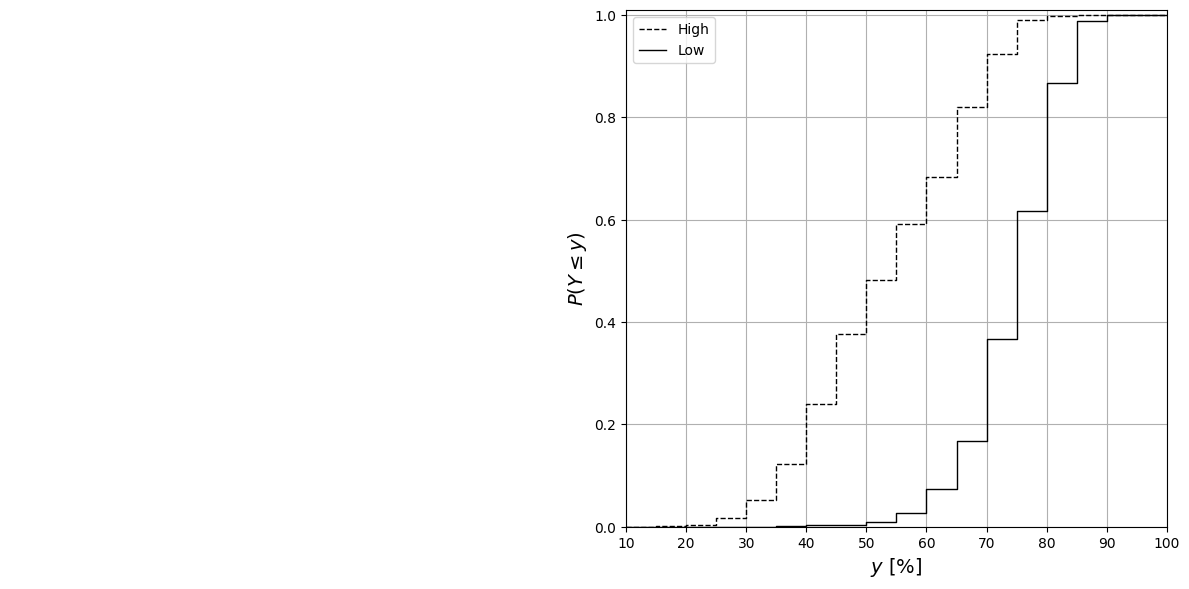

In [29]:
datahigh_y = 100 * datahigh.iloc[:, 1]
datalow_y = 100 * datalow.iloc[:, 1]

# Function to compute the empirical CDF
def empirical_cdf(data, thresholds):
    N = len(data)
    F = np.zeros(len(thresholds))
    for i, t in enumerate(thresholds):
        F[i] = np.sum(data <= t) / N
    return F

# Define the thresholds
t = np.arange(10, 105, 5)

# Compute empirical CDFs
F_high = empirical_cdf(datahigh_y, t)
F_low = empirical_cdf(datalow_y, t)

# Create a subplot
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# First subplot is hidden
ax[0].axis('off')

# Second subplot: Stairs plot for empirical CDFs
ax[1].step(t, F_high, where='post', linewidth=1, color='black', linestyle='--', label='High')
ax[1].step(t, F_low, where='post', linewidth=1, color='black', linestyle='-', label='Low')

# Labels, grid, and axis settings
ax[1].set_xlabel('$y$ [%]', fontsize=14)
ax[1].set_ylabel('${P}(Y \\leq y)$', fontsize=14)
ax[1].grid(True)
ax[1].axis([10, 100, 0, 1.01])

# Legend
ax[1].legend(loc='upper left')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [30]:
# Compute coefficients of variation for both the high temperature data and the low temperature data

SD1 = np.std(datahigh.iloc[:, 1])
E1 = np.mean(datahigh.iloc[:, 1])
CV1 = SD1 / E1

SD2 = np.std(datalow.iloc[:, 1])
E2 = np.mean(datalow.iloc[:, 1])
CV2 = SD2 / E2

print(f"SD1: {SD1}")
print(f"E1: {E1}")
print(f"CV1: {CV1}")

print(f"SD2: {SD2}")
print(f"E2: {E2}")
print(f"CV2: {CV2}")

SD1: 0.13322551489856552
E1: 0.5093609802676082
CV1: 0.2615542219754867
SD2: 0.07729231063032944
E2: 0.7189263204575923
CV2: 0.10751075378786153
